# 4주차 미션 - 새로운 데이터셋에 분류 모델 적용하기

## 주제 - Mobile Price Classification(Kaggle Data)
- 데이터 링크: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 미션 1) 데이터 로드와 피처엔지니어링 🔍📊
- 데이터셋을 탐색하여 기본적인 통계, 분포, 결측치 등을 확인합니다.
- 필요에 따라 결측치 처리, 이상치 제거, 데이터 형식 변환 등의 전처리 작업을 수행합니다.
- 피처 엔지니어링을 통해 데이터의 특성에 맞게 피처를 선택, 생성, 변환합니다. 예를 들어, 범주형 데이터의 경우 One-hot encoding을 적용할 수 있습니다.

|컬럼명|설명|컬럼명|설명|
|--|--|--|--|
|'battery_power'|Total energy a battery can store in one time measured in mAh|'px_height'|Pixel Resolution Height|
|'blue'|Has bluetooth or not|'px_width'|Pixel Resolution Width|
|'clock_speed'|speed at which microprocessor executes instructions|'ram'|Random Access Memory in Mega Bytes|
|'dual_sim'|Has dual sim support or not|'sc_h'|Screen Height of mobile in cm|
|'fc'|Front Camera mega pixels|'sc_w'|Screen Width of mobile in cm|
|'four_g'|Has 4G or not|'talk_time'|longest time that a single battery charge will last when you are|
|'int_memory'|Internal Memory in Gigabytes|'three_g'|Has 3G or not|
|'m_dep'|Mobile Depth in cm|'touch_screen'|Has touch screen or not|
|'mobile_wt'|Weight of mobile phone|'wifi'|Has wifi or not|
|'n_cores'|Number of cores of processor|'price_range'|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).|
|'pc'|Primary Camera mega pixels| | |

#### 1. 데이터 불러오기

In [2]:
train_df = pd.read_csv("../data/archive/train.csv")
train_df.shape

(2000, 21)

#### 2. 데이터 확인하기

In [3]:
# 컬럼 확인
train_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
# 데이터 타입과 결측치 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


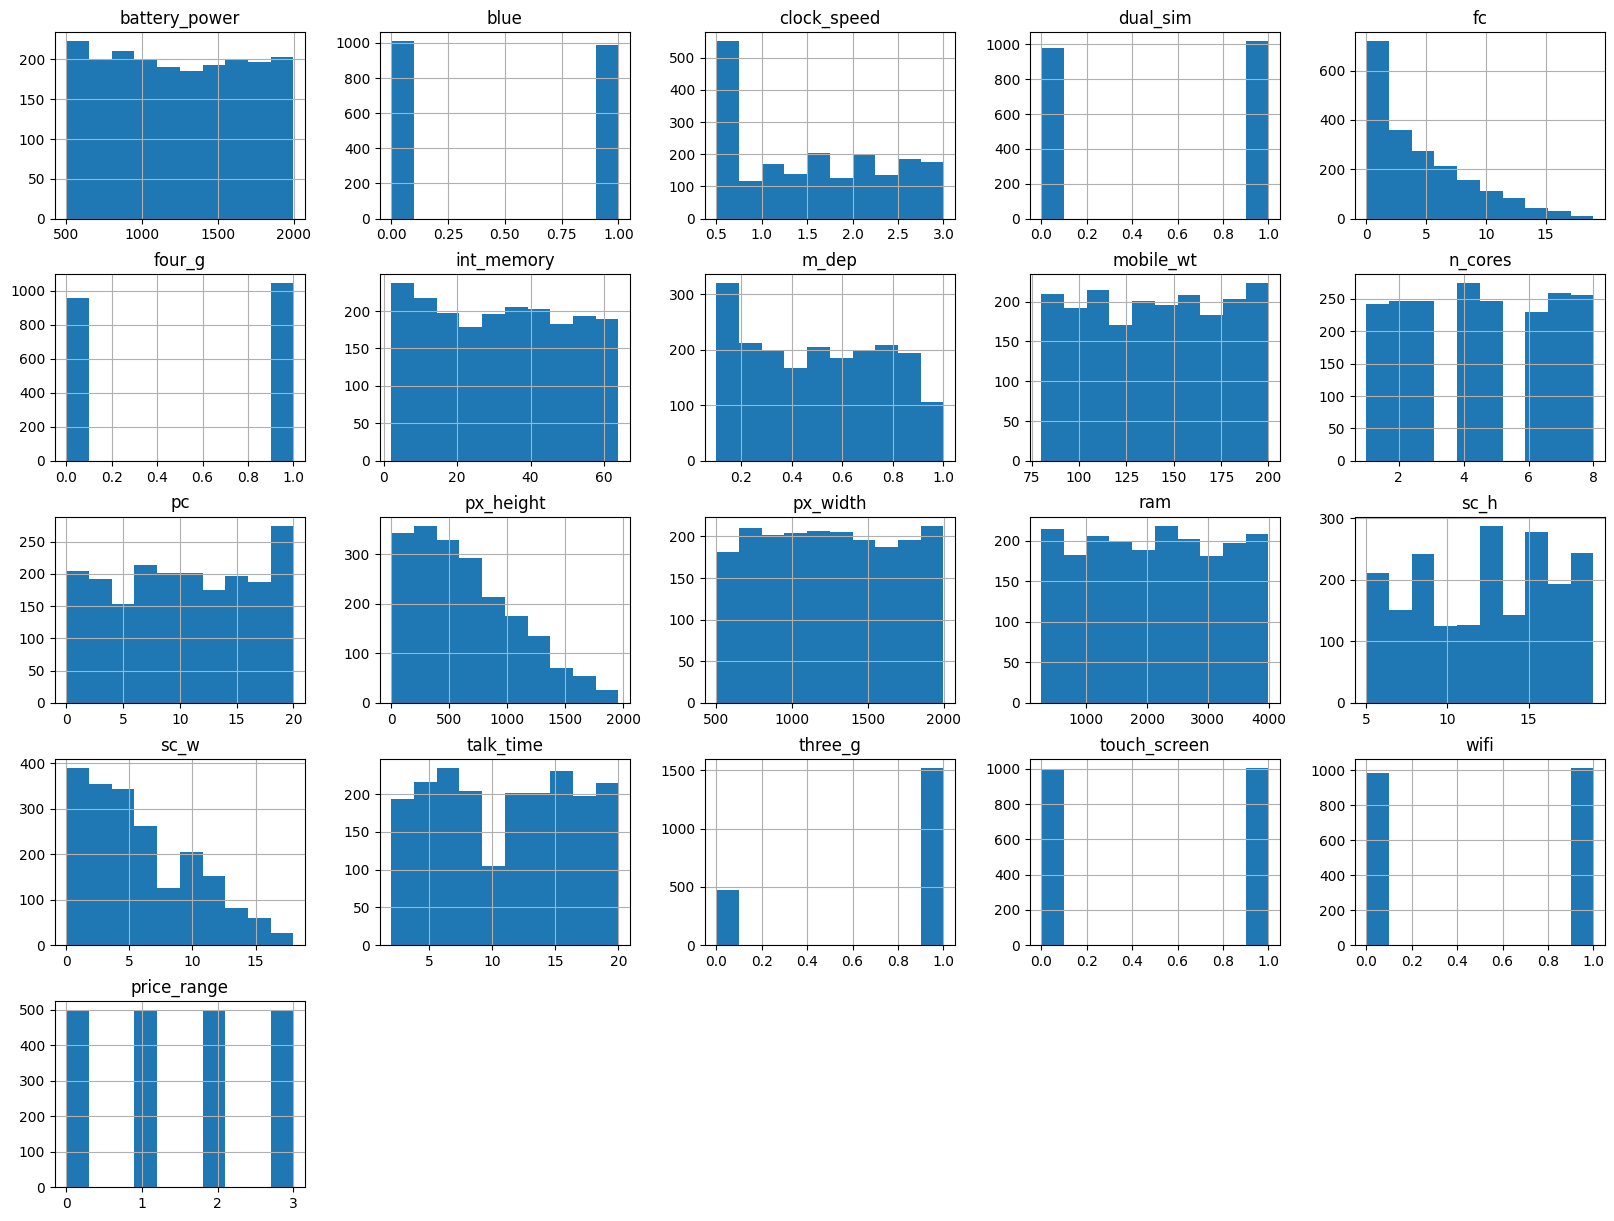

In [6]:
# 컬럼별 hist
train_df.hist(figsize=(20,15))
plt.show()

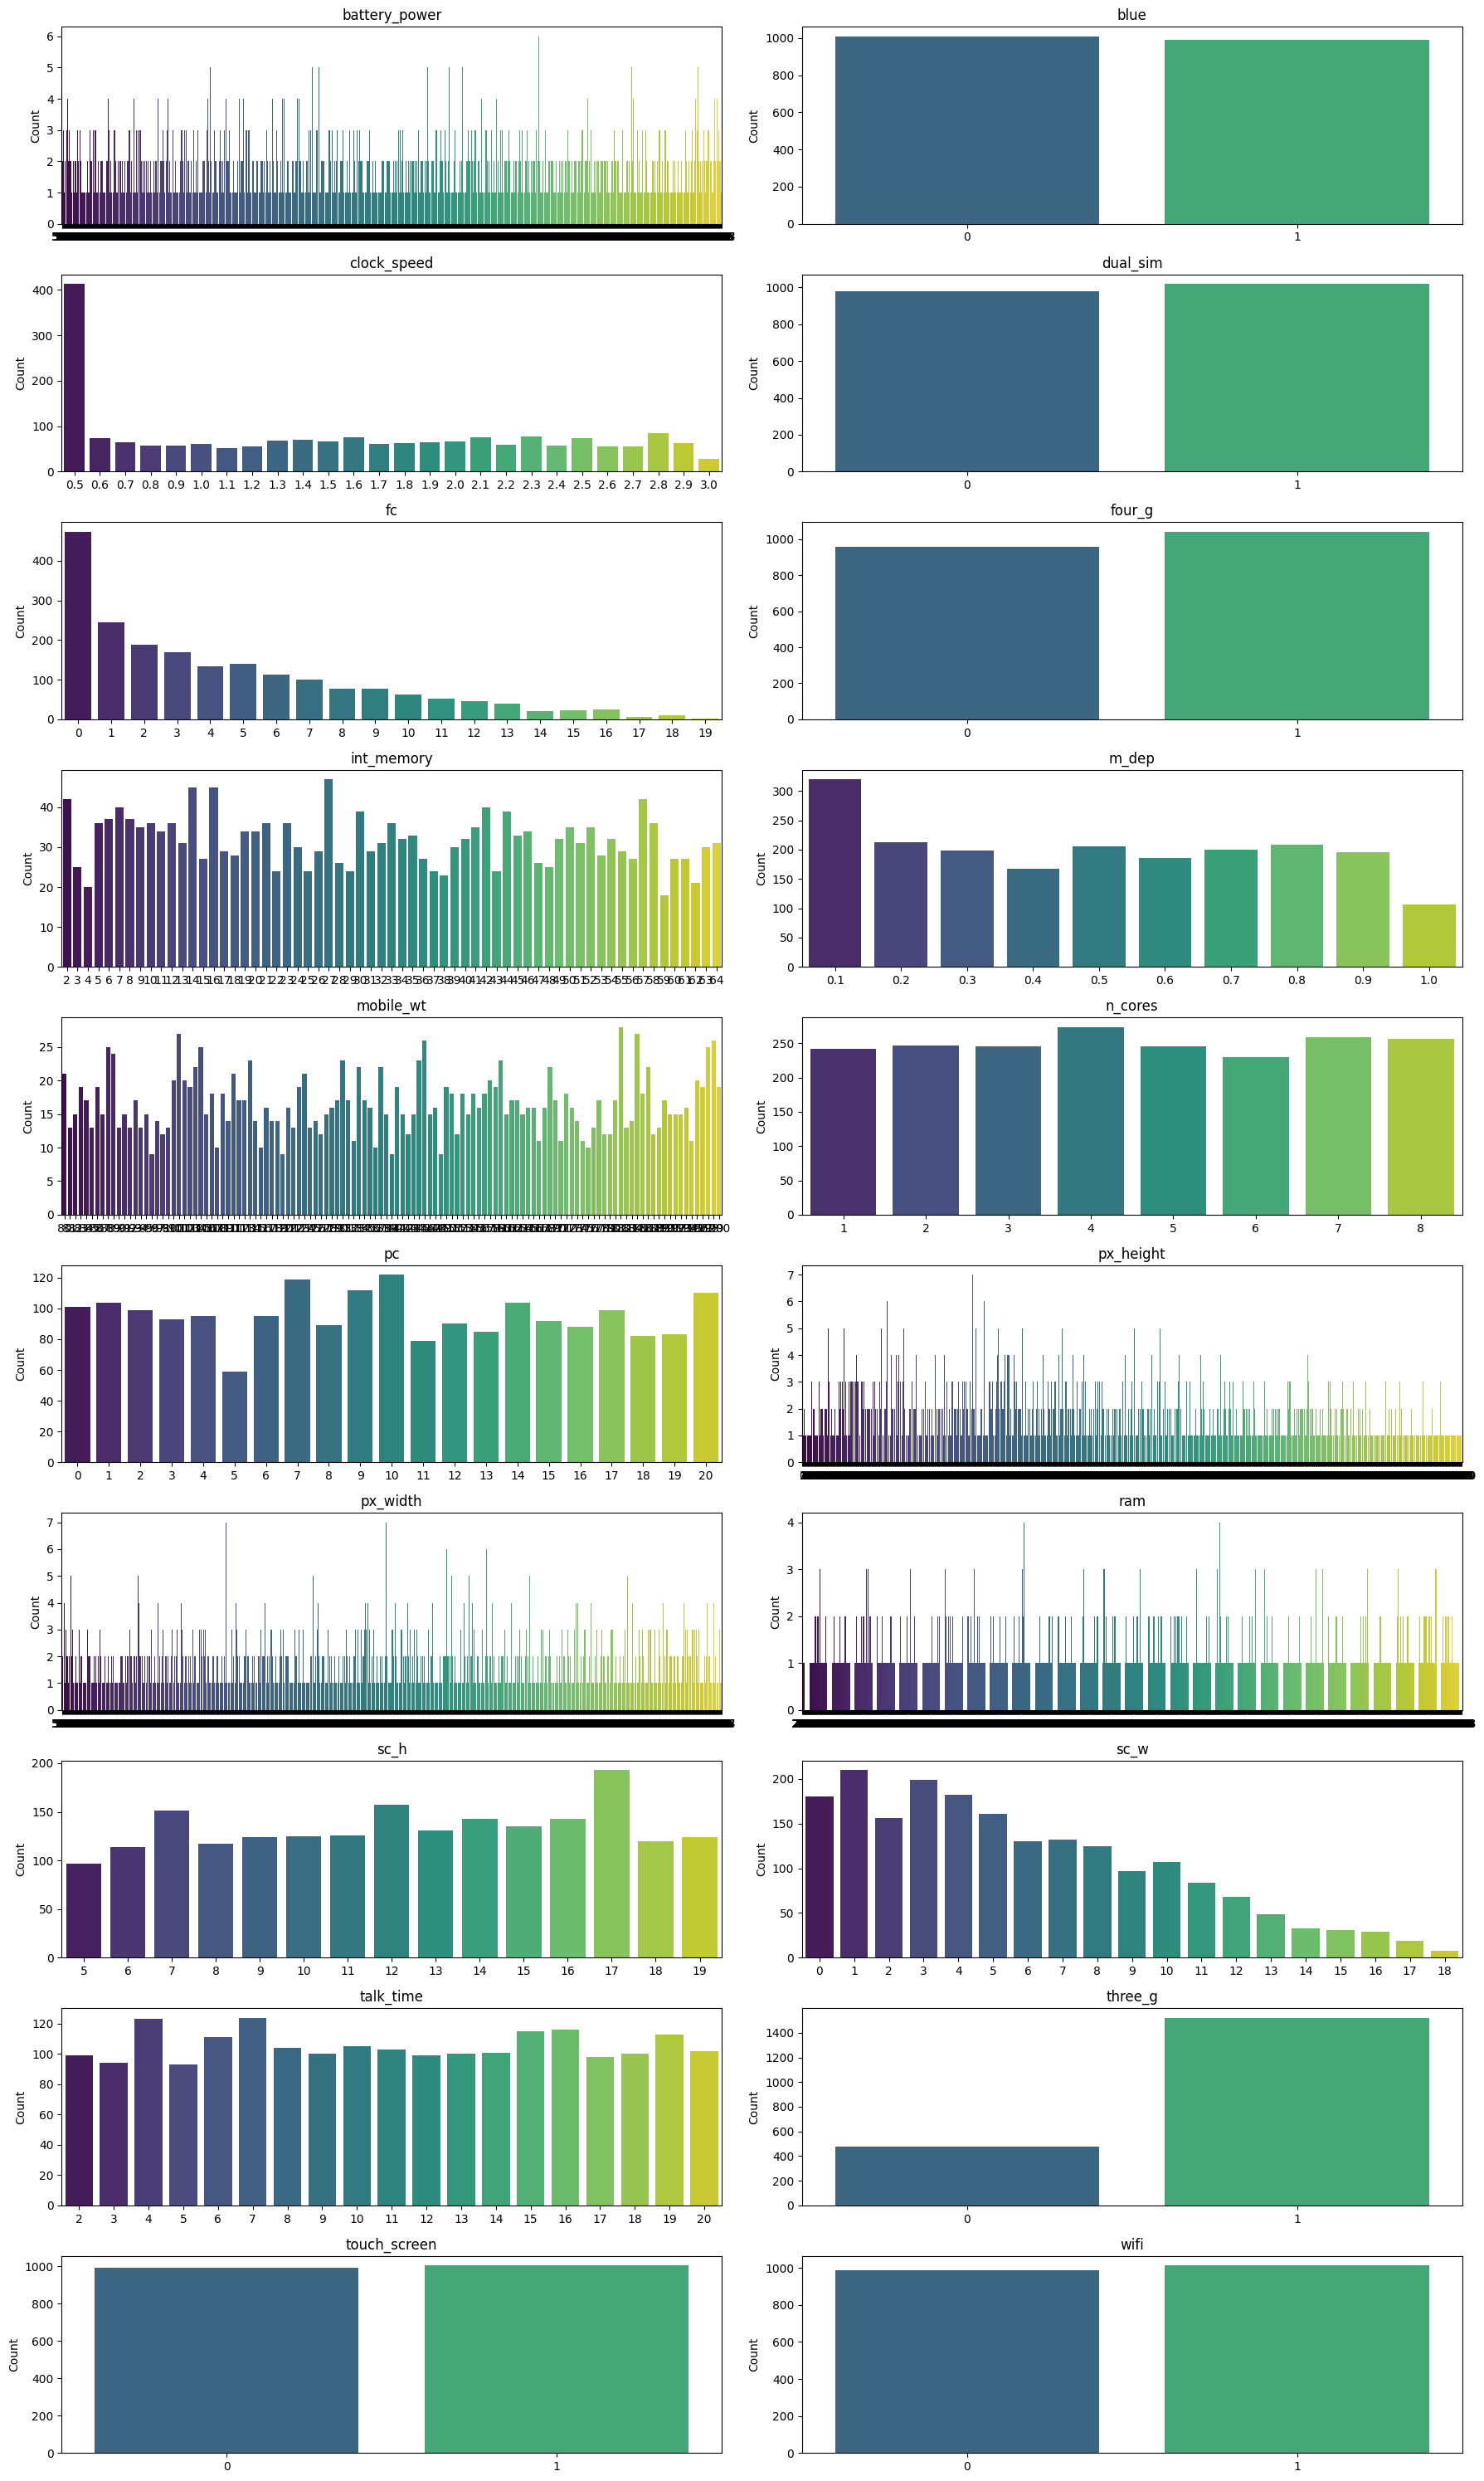

In [7]:
# 컬럼별 countplot
plt.figure(figsize=(18,30))
for i, column in enumerate(train_df.columns[:-1]):
    plt.subplot(10, 2, i+1)
    sns.countplot(x=column, data=train_df, palette='viridis')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Axes: >

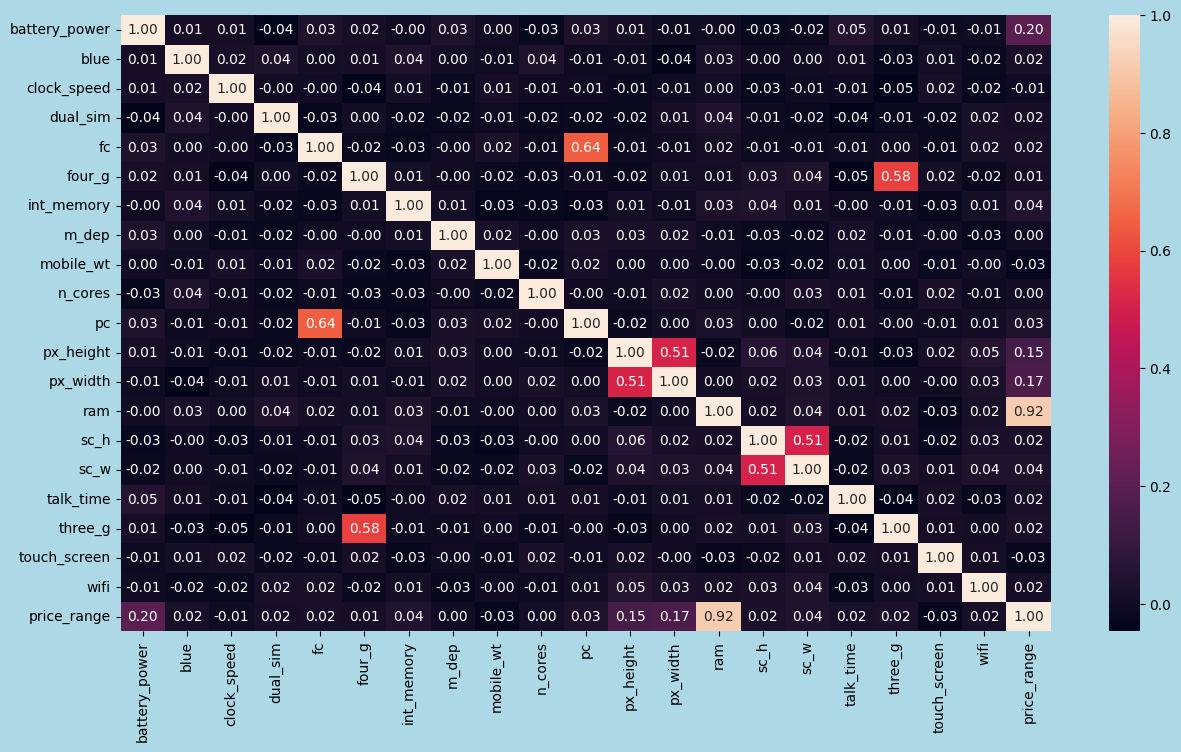

In [8]:
# 컬럼별 상관관계
plt.figure(figsize= (15, 8), facecolor='lightblue')
sns.heatmap(train_df.corr(), annot=True , fmt=".2f")

### 미션 2) 모델 선택 🧠
- 분류 문제에 적합한 머신러닝 알고리즘을 선택합니다. 예를 들어, 로지스틱 회귀, 결정 트리, 랜덤 포레스트, 서포트 벡터 머신(SVM), 그라디언트 부스팅 등이 있습니다. 베이스라인 모델 생성하여 성능의 기준점을 설정합니다.

### 미션 3) 모델 훈련 🤖
- 데이터셋을 훈련 세트와 테스트 세트로 분할합니다. 일반적으로 데이터의 70-80%를 훈련용으로, 나머지를 테스트용으로 사용합니다. 모델에 학습 데이터셋과 정답을 학습시키고 예측 데이터셋으로 예측을 진행합니다.

### 미션 4) 하이퍼파라미터 튜닝 ⚙️
- 그리드 서치, 랜덤 서치 등을 활용하여 모델의 하이퍼파라미터를 조정하여 모델의 성능을 최적화합니다. 이 때, 모델의 일반화 성능을 평가하기 위해 교차 검증을 수행합니다.
(참고) xgboost, lightGBM, catBoost는 하이퍼파라미터 튜닝 기능을 제공합니다.

### 미션 5) 모델 평가 및 선택 🎯
- 학습된 모델을 테스트 데이터 또는 새로운 데이터에 적용하여 성능을 평가합니다. 이때 사용할 평가 지표는 태스크에 따라 다를 수 있습니다. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1-score 등을 고려합니다.

In [19]:
# train, test 데이터셋 분리
from sklearn.model_selection import train_test_split

# 모델 선정
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 스케일링
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 모델 평가
from sklearn.metrics import accuracy_score

#### 1.결정트리

##### 1.1 스케일링 x

In [20]:
# 독립변수, 종속변수 분류
X = train_df.drop("price_range", axis=1)
y = train_df["price_range"].values.ravel()

# train, test 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 선정
clf = DecisionTreeClassifier(random_state=42)

# 하이퍼 파라미터 튜닝
param_grid = {"max_depth":range(3,12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}

max_depth = np.random.randint(3, 20, 10)
max_features = np.random.uniform(0.7, 1.0, 100)
param_distributions = {"max_depth" :max_depth,
           "max_features": max_features,
           "min_samples_split" : list(range(2, 7))}

model = GridSearchCV(clf, param_grid=param_grid, n_jobs=-1, cv=5, verbose=0)

model2 = RandomizedSearchCV(clf, 
                            param_distributions,
                            n_iter=1000,
                            scoring="accuracy",
                            n_jobs=-1,
                            cv=5,
                            random_state=42)

# 모델 훈련 - model: GridSearch, model2: RandomSearchCV
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

# 모델 평가
score = accuracy_score(y_test , y_pred)
score2 = accuracy_score(y_test , y_pred2)

print("< DecisionTreeClassifier> ")
print("---" * 50)
print(f"GridSearchCV 최적의 파라미터 : {model.best_params_}")
print(f"GridSearchCV 최고 정확도 : {round(model.best_score_, 3)}")
print(f"GridSearchCV accuracy_score : {round(score, 3)}")
print("---" * 50)
print(f"RandomSearchCV 최적의 파라미터 : {model2.best_params_}")
print(f"RandomSearchCV 최고 정확도 : {round(model2.best_score_, 3)}")
print(f"RandomSearchCV accuracy_score : {round(score2, 3)}")

< DecisionTreeClassifier> 
파라미터 튜닝 전 accuracy_score : <function accuracy_score at 0x289511af0>
------------------------------------------------------------------------------------------------------------------------------------------------------
GridSearchCV 최적의 파라미터 : {'max_depth': 8, 'max_features': 0.9}
GridSearchCV 최고 정확도 : 0.835
GridSearchCV accuracy_score : 0.825
------------------------------------------------------------------------------------------------------------------------------------------------------
RandomSearchCV 최적의 파라미터 : {'min_samples_split': 5, 'max_features': 0.8905257900384568, 'max_depth': 8}
RandomSearchCV 최고 정확도 : 0.839
RandomSearchCV accuracy_score : 0.828


##### 1.2 스케일링 o

In [21]:
# 독립변수, 종속변수 분류
X = train_df.drop("price_range", axis=1)
y = train_df["price_range"].values.ravel()

# 스케일링
Scaler = StandardScaler()
X_norm = Scaler.fit_transform(X)

# train, test 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# 모델 선정
clf_scal = DecisionTreeClassifier(random_state=42)

# 하이퍼 파라미터 튜닝
param_grid = {"max_depth":range(3,12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}

max_depth = np.random.randint(3, 20, 10)
max_features = np.random.uniform(0.7, 1.0, 100)
param_distributions = {"max_depth" :max_depth,
           "max_features": max_features,
           "min_samples_split" : list(range(2, 7))}

model = GridSearchCV(clf_scal, param_grid=param_grid, n_jobs=-1, cv=5, verbose=0)

model2 = RandomizedSearchCV(clf_scal, 
                            param_distributions,
                            n_iter=1000,
                            scoring="accuracy",
                            n_jobs=-1,
                            cv=5,
                            random_state=42)

# 모델 훈련 - model: GridSearch, model2: RandomSearchCV
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

# 모델 평가
score = accuracy_score(y_test , y_pred)
score2 = accuracy_score(y_test , y_pred2)

print("< DecisionTreeClassifier > ")
print("---" * 50)
print(f"GridSearchCV 최적의 파라미터 : {model.best_params_}")
print(f"GridSearchCV 최고 정확도 : {round(model.best_score_, 3)}")
print(f"GridSearchCV accuracy_score : {round(score, 3)}")
print("---" * 50)
print(f"RandomSearchCV 최적의 파라미터 : {model2.best_params_}")
print(f"RandomSearchCV 최고 정확도 : {round(model2.best_score_, 3)}")
print(f"RandomSearchCV accuracy_score : {round(score2, 3)}")

< DecisionTreeClassifier > 
------------------------------------------------------------------------------------------------------------------------------------------------------
GridSearchCV 최적의 파라미터 : {'max_depth': 8, 'max_features': 0.9}
GridSearchCV 최고 정확도 : 0.836
GridSearchCV accuracy_score : 0.825
------------------------------------------------------------------------------------------------------------------------------------------------------
RandomSearchCV 최적의 파라미터 : {'min_samples_split': 5, 'max_features': 0.927966189593443, 'max_depth': 17}
RandomSearchCV 최고 정확도 : 0.833
RandomSearchCV accuracy_score : 0.825


#### 2.서포트 벡터 머신(SVM)

In [22]:
# 모델 선정
clf_svm = SVC(random_state=42)

# 하이퍼 파라미터 선정
param_svm = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.01, 0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly']}

model_svm = GridSearchCV(clf_svm, param_grid=param_svm, n_jobs=-1, cv=5, verbose=0)
model_svm2 = RandomizedSearchCV(clf_svm, 
                                param_distributions=param_svm, 
                                n_iter=100, 
                                scoring="accuracy", 
                                n_jobs=-1, 
                                cv=5, 
                                random_state=42)

# 모델 훈련
model_svm.fit(X_train, y_train)
model_svm2.fit(X_train, y_train)

# 모델 예측
y_pred_svm = model_svm.predict(X_test)
y_pred_svm2 = model_svm2.predict(X_test)

# 모델 평가
score_svm = accuracy_score(y_test, y_pred_svm)
score_svm2 = accuracy_score(y_test, y_pred_svm)

print("< Support Vector Machine (SVM) >")
print("---" * 50)
print(f"GridSearchCV 최적의 파라미터 : {model_svm.best_params_}")
print(f"GridSearchCV 최고 정확도 : {round(model_svm.best_score_, 3)}")
print(f"GridSearchCV accuracy_score : {round(score_svm, 3)}")
print("---" * 50)
print(f"RandomizedSearchCV 최적의 파라미터 : {model_svm2.best_params_}")
print(f"RandomizedSearchCV 최고 정확도 : {round(model_svm2.best_score_, 3)}")
print(f"RandomizedSearchCV accuracy_score : {round(score_svm2, 3)}")


/Users/kimminsoo/miniconda/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


< Support Vector Machine (SVM) >
------------------------------------------------------------------------------------------------------------------------------------------------------
GridSearchCV 최적의 파라미터 : {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
GridSearchCV 최고 정확도 : 0.962
GridSearchCV accuracy_score : 0.975
------------------------------------------------------------------------------------------------------------------------------------------------------
RandomizedSearchCV 최적의 파라미터 : {'kernel': 'linear', 'gamma': 0.01, 'C': 100}
RandomizedSearchCV 최고 정확도 : 0.962
RandomizedSearchCV accuracy_score : 0.975


#### 3.랜덤 포레스트

In [23]:
# 모델 선정
clf_rf = RandomForestClassifier(random_state=42)

# 하이퍼 파라미터 선정
param_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [3, 6, 9],
                 'max_features': [0.3, 0.5, 0.7, 0.9, 1]}

model_rf = GridSearchCV(clf_rf, param_grid=param_rf, n_jobs=-1, cv=5, verbose=0)
model_rf2 = RandomizedSearchCV(clf_rf, 
                              param_distributions=param_rf, 
                              n_iter=150, 
                              scoring="accuracy", 
                              n_jobs=-1, 
                              cv=5, 
                              random_state=42)

# 모델 훈련
model_rf.fit(X_train, y_train)
model_rf2.fit(X_train, y_train)

# 모델 예측
y_pred_rf = model_rf.predict(X_test)
y_pred_rf2 = model_rf2.predict(X_test)

# 모델 평가 
score_rf = accuracy_score(y_test, y_pred_rf)
score_rf2 = accuracy_score(y_test, y_pred_rf2)


print("< Random Forest >")
print("---" * 50)
print(f"GridSearchCV 최적의 파라미터 : {model_rf.best_params_}")
print(f"GridSearchCV 최고 정확도 : {round(model_rf.best_score_, 3)}")
print(f"GridSearchCV accuracy_score : {round(score_rf, 3)}")
print("---" * 50)
print(f"RandomizedSearchCV 최적의 파라미터 : {model_rf2.best_params_}")
print(f"RandomizedSearchCV 최고 정확도 : {round(model_rf2.best_score_, 3)}")
print(f"RandomizedSearchCV accuracy_score : {round(score_rf2, 3)}")

/Users/kimminsoo/miniconda/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


< Random Forest >
------------------------------------------------------------------------------------------------------------------------------------------------------
GridSearchCV 최적의 파라미터 : {'max_depth': 9, 'max_features': 0.5, 'n_estimators': 200}
GridSearchCV 최고 정확도 : 0.891
GridSearchCV accuracy_score : 0.912
------------------------------------------------------------------------------------------------------------------------------------------------------
RandomizedSearchCV 최적의 파라미터 : {'n_estimators': 200, 'max_features': 0.5, 'max_depth': 9}
RandomizedSearchCV 최고 정확도 : 0.891
RandomizedSearchCV accuracy_score : 0.912


#### 4.로지스틱 회귀

In [24]:
# 모델 선정
clf_lr = LogisticRegression(random_state=42)

# 하이퍼 파라미터 선정
param_lr = {'C': [0.1, 1, 10, 100],
                 'penalty': ['l1', 'l2']}

model_lr = GridSearchCV(clf_lr, param_grid=param_lr, n_jobs=-1, cv=5, verbose=0)
model_lr2 = RandomizedSearchCV(clf_lr,
                               param_distributions=param_lr, 
                               n_iter=100, 
                               scoring="accuracy", 
                               n_jobs=-1, 
                               cv=5, 
                               random_state=42)

# 모델 훈련
model_lr.fit(X_train, y_train)
model_lr2.fit(X_train, y_train)

# 모델 예측
y_pred_lr = model_lr.predict(X_test)
y_pred_lr2 = model_lr2.predict(X_test)

# 모델 평가 
score_lr = accuracy_score(y_test, y_pred_lr)
score_lr2 = accuracy_score(y_test, y_pred_lr2)

print("< Logistic Regression >")
print("---" * 50)
print(f"GridSearchCV 최적의 파라미터 : {model_lr.best_params_}")
print(f"GridSearchCV 최고 정확도 : {round(model_lr.best_score_, 3)}")
print(f"GridSearchCV accuracy_score : {round(score_lr, 3)}")
print("---" * 50)
print(f"RandomizedSearchCV 최적의 파라미터 : {model_lr2.best_params_}")
print(f"RandomizedSearchCV 최고 정확도 : {round(model_lr2.best_score_, 3)}")
print(f"RandomizedSearchCV accuracy_score : {round(score_lr2, 3)}")

< Logistic Regression >
------------------------------------------------------------------------------------------------------------------------------------------------------
GridSearchCV 최적의 파라미터 : {'C': 100, 'penalty': 'l2'}
GridSearchCV 최고 정확도 : 0.964
GridSearchCV accuracy_score : 0.975
------------------------------------------------------------------------------------------------------------------------------------------------------
RandomizedSearchCV 최적의 파라미터 : {'penalty': 'l2', 'C': 100}
RandomizedSearchCV 최고 정확도 : 0.964
RandomizedSearchCV accuracy_score : 0.975


/Users/kimminsoo/miniconda/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminsoo/miniconda/envs/tensorflow/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable